## **Question 1**
### **Part 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
#Creating the dataset
from sklearn.datasets import make_moons

# Generate dataset with 1000 samples, noise = 0.3 and random state = 42
X_q1, y_q1 = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [46]:
print(X_q1)

[[-0.17186341  0.59624885]
 [ 1.25328273 -0.26541353]
 [ 0.72322405  0.2319425 ]
 ...
 [ 1.77095705 -0.50943619]
 [-1.06177158  0.006786  ]
 [ 0.76117231  0.65196041]]


In [47]:
print(y_q1)

[1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 

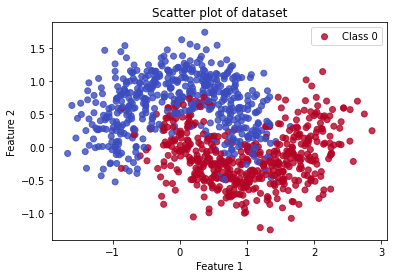

In [48]:
#Plotting the generated dataset
plt.scatter(X_q1[:,0], X_q1[:,1], c=y_q1, cmap='coolwarm', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of dataset')
plt.legend(['Class 0', 'Class 1'])
plt.show()

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform preprocessing
scaler = StandardScaler()
X_q1 = scaler.fit_transform(X_q1)

# Split the dataset into training and test sets
X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(X_q1, y_q1, test_size=0.2, random_state=42)

### Training Decision Tree Classifier

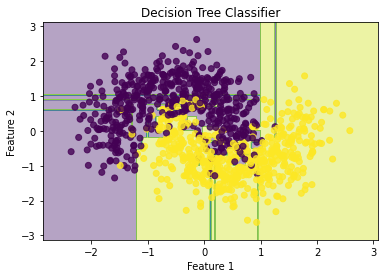

In [50]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

dtc_q1 = DecisionTreeClassifier()
dtc_q1.fit(X_train_q1, y_train_q1)

# Plotting the decision boundary
x_min_dtc, x_max_dtc = X_q1[:, 0].min() - 0.5, X_q1[:, 0].max() + 0.5
y_min_dtc, y_max_dtc = X_q1[:, 1].min() - 0.5, X_q1[:, 1].max() + 0.5
xx_dtc, yy_dtc = np.meshgrid(np.arange(x_min_dtc, x_max_dtc, 0.01),np.arange(y_min_dtc, y_max_dtc, 0.01))
Z_dtc = dtc_q1.predict(np.c_[xx_dtc.ravel(), yy_dtc.ravel()])
Z_dtc = Z_dtc.reshape(xx_dtc.shape)
plt.contourf(xx_dtc, yy_dtc, Z_dtc, alpha=0.4)
plt.scatter(X_q1[:, 0], X_q1[:, 1], c=y_q1, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Classifier')
plt.show()

In [51]:
##Performing hyperparameter tuning for finding the best value of max_depth
##Using 5 fold Cross-Validation from GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# defining the range of hyperparameters to be tuned
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

# performing cross-validation using GridSearchCV
grid_search = GridSearchCV(estimator=dtc_q1, param_grid=param_grid, cv=5)
grid_search.fit(X_train_q1, y_train_q1)

# printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Value of max_depth is: ",grid_search.best_params_['max_depth'])


Best Hyperparameters: {'max_depth': 2}
Best Value of max_depth is:  2


### Bagging Classifier

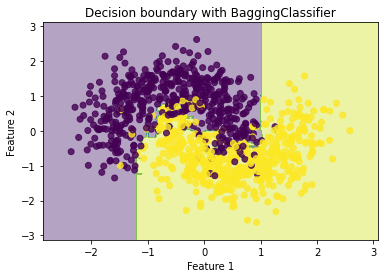

In [52]:
from sklearn.ensemble import BaggingClassifier

# Defining the base classifier
base_clf_q1 = DecisionTreeClassifier()

# Training the BaggingClassifier with 100 estimators
bag_clf_q1 = BaggingClassifier(base_estimator=base_clf_q1, n_estimators=100, random_state=42)
bag_clf_q1.fit(X_train_q1, y_train_q1)

# Plotting the decision boundary
x_min_bc, x_max_bc = X_q1[:, 0].min() - 0.5, X_q1[:, 0].max() + 0.5
y_min_bc, y_max_bc = X_q1[:, 1].min() - 0.5, X_q1[:, 1].max() + 0.5
xx_bc, yy_bc = np.meshgrid(np.arange(x_min_bc, x_max_bc, 0.01),np.arange(y_min_bc, y_max_bc, 0.01))
Z_bc = bag_clf_q1.predict(np.c_[xx_bc.ravel(), yy_bc.ravel()])
Z_bc = Z_bc.reshape(xx_bc.shape)
plt.contourf(xx_bc, yy_bc, Z_bc, alpha=0.4)
plt.scatter(X_q1[:, 0], X_q1[:, 1], c=y_q1, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary with BaggingClassifier')
plt.show()


### Random Forest Classifier

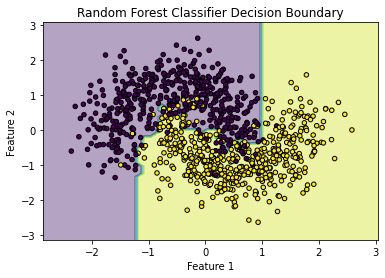

In [62]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest Classifier with 100 trees
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_q1, y_train_q1)

# Defining the boundaries of the meshgrid to create the decision boundary
x_min_rfc, x_max_rfc = X_q1[:, 0].min() - 0.5, X_q1[:, 0].max() + 0.5
y_min_rfc, y_max_rfc = X_q1[:, 1].min() - 0.5, X_q1[:, 1].max() + 0.5
xx_rfc, yy_rfc = np.meshgrid(np.arange(x_min_rfc, x_max_rfc, 0.1), np.arange(y_min_rfc, y_max_rfc, 0.1))

# Predict the labels of the meshgrid points
Z_rfc = rf_clf.predict(np.c_[xx_rfc.ravel(), yy_rfc.ravel()])
Z_rfc = Z_rfc.reshape(xx_rfc.shape)

# Plot the decision boundary
plt.contourf(xx_rfc, yy_rfc, Z_rfc, alpha=0.4)
plt.scatter(X_q1[:, 0], X_q1[:, 1], c=y_q1, s=20, edgecolor='k')
plt.title("Random Forest Classifier Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### Comparing the three models

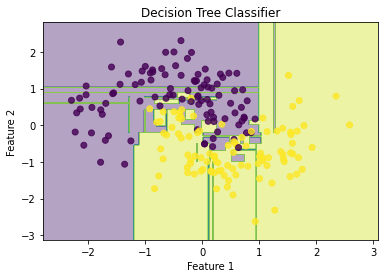

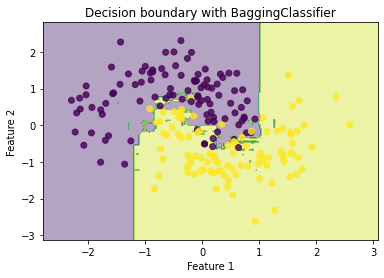

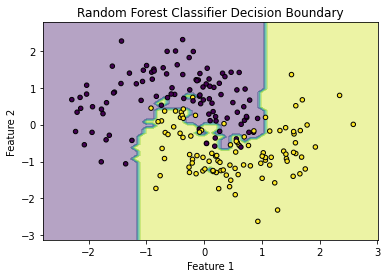

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_decision_regions

#Decision Tree Classifier
y_pred_dtc = dtc_q1.predict(X_test_q1)
dtc_acc = accuracy_score(y_test_q1, y_pred_dtc)
dtc_prec = precision_score(y_test_q1, y_pred_dtc)
dtc_recall = recall_score(y_test_q1, y_pred_dtc)
dtc_f1 = f1_score(y_test_q1, y_pred_dtc)

# Plotting the decision boundary
x_min_dtc, x_max_dtc = X_test_q1[:, 0].min() - 0.5, X_test_q1[:, 0].max() + 0.5
y_min_dtc, y_max_dtc = X_test_q1[:, 1].min() - 0.5, X_test_q1[:, 1].max() + 0.5
xx_dtc, yy_dtc = np.meshgrid(np.arange(x_min_dtc, x_max_dtc, 0.01),np.arange(y_min_dtc, y_max_dtc, 0.01))
Z_dtc = dtc_q1.predict(np.c_[xx_dtc.ravel(), yy_dtc.ravel()])
Z_dtc = Z_dtc.reshape(xx_dtc.shape)
plt.contourf(xx_dtc, yy_dtc, Z_dtc, alpha=0.4)
plt.scatter(X_test_q1[:, 0], X_test_q1[:, 1], c=y_test_q1, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Classifier')
plt.show()
# plt.figure()
# plot_decision_regions(X_test_q1, y_test_q1, clf=dtc_q1, legend=1)
# plt.title("Decision Tree Classifier")

#Bagging Classifier
y_pred_bc = bag_clf_q1.predict(X_test_q1)
bc_acc = accuracy_score(y_test_q1, y_pred_bc)
bc_prec = precision_score(y_test_q1, y_pred_bc)
bc_recall = recall_score(y_test_q1, y_pred_bc)
bc_f1 = f1_score(y_test_q1, y_pred_bc)

# Plotting the decision boundary
x_min_bc, x_max_bc = X_test_q1[:, 0].min() - 0.5, X_test_q1[:, 0].max() + 0.5
y_min_bc, y_max_bc = X_test_q1[:, 1].min() - 0.5, X_test_q1[:, 1].max() + 0.5
xx_bc, yy_bc = np.meshgrid(np.arange(x_min_bc, x_max_bc, 0.01),np.arange(y_min_bc, y_max_bc, 0.01))
Z_bc = bag_clf_q1.predict(np.c_[xx_bc.ravel(), yy_bc.ravel()])
Z_bc = Z_bc.reshape(xx_bc.shape)
plt.contourf(xx_bc, yy_bc, Z_bc, alpha=0.4)
plt.scatter(X_test_q1[:, 0], X_test_q1[:, 1], c=y_test_q1, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision boundary with BaggingClassifier')
plt.show()
# plt.figure()
# plot_decision_regions(X_test_q1, y_test_q1, clf=bag_clf_q1, legend=2)
plt.title("Bagging Classifier")

#Random Forest Classifier
y_pred_rfc = rf_clf.predict(X_test_q1)
rfc_acc = accuracy_score(y_test_q1, y_pred_rfc)
rfc_prec = precision_score(y_test_q1, y_pred_rfc)
rfc_recall = recall_score(y_test_q1, y_pred_rfc)
rfc_f1 = f1_score(y_test_q1, y_pred_rfc)

# Plotting the decision boundary
x_min_rfc, x_max_rfc = X_test_q1[:, 0].min() - 0.5, X_test_q1[:, 0].max() + 0.5
y_min_rfc, y_max_rfc = X_test_q1[:, 1].min() - 0.5, X_test_q1[:, 1].max() + 0.5
xx_rfc, yy_rfc = np.meshgrid(np.arange(x_min_rfc, x_max_rfc, 0.1), np.arange(y_min_rfc, y_max_rfc, 0.1))
Z_rfc = rf_clf.predict(np.c_[xx_rfc.ravel(), yy_rfc.ravel()])
Z_rfc = Z_rfc.reshape(xx_rfc.shape)
plt.contourf(xx_rfc, yy_rfc, Z_rfc, alpha=0.4)
plt.scatter(X_test_q1[:, 0], X_test_q1[:, 1], c=y_test_q1, s=20, edgecolor='k')
plt.title("Random Forest Classifier Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# plt.figure()
# plot_decision_regions(X_test_q1, y_test_q1, clf=rf_clf, legend=2)
# plt.title("Random Forest Classifier")

In [73]:
# Printing metrics
print("Decision Tree Classifier: \n Accuracy: {} \n Precision: {} \n Recall: {} \n F1-Score: {}".format(dtc_acc, dtc_prec, dtc_recall, dtc_f1))
print("\nBagging Classifier: \n Accuracy: {} \n Precision: {} \n Recall: {} \n F1-Score: {}".format(bc_acc, bc_prec, bc_recall, bc_f1))
print("\nRandom Forest Classifier: \n Accuracy: {} \n Precision: {} \n Recall: {} \n F1-Score: {}".format(rfc_acc, rfc_prec, rfc_recall, rfc_f1))

Decision Tree Classifier: 
 Accuracy: 0.905 
 Precision: 0.9090909090909091 
 Recall: 0.9 
 F1-Score: 0.9045226130653266

Bagging Classifier: 
 Accuracy: 0.895 
 Precision: 0.898989898989899 
 Recall: 0.89 
 F1-Score: 0.8944723618090452

Random Forest Classifier: 
 Accuracy: 0.905 
 Precision: 0.9175257731958762 
 Recall: 0.89 
 F1-Score: 0.9035532994923858


### Varying number of estimators

In [14]:
acc_index_baggclass = []
acc_index_rfclass = []
acc_baggclass = []
acc_rfclass = []

for i in range(10,21):
  '''Bagging Classifier'''
  # Defining the base classifier
  base_clf_q1 = DecisionTreeClassifier(max_depth=None)

  # Training the BaggingClassifier with 100 estimators
  bag_clf_q1 = BaggingClassifier(base_estimator=base_clf_q1, n_estimators=i*10, random_state=42)
  bag_clf_q1.fit(X_train_q1, y_train_q1)
  y_pred_bc = bag_clf_q1.predict(X_test_q1)
  bc_acc = accuracy_score(y_test_q1, y_pred_bc)
  acc_baggclass.append(bc_acc)
  acc_index_baggclass.append(i)
  print("Accuracy Score for Bagging Classifier when n_estimators are {} is {}".format(i*10,bc_acc))

print('\n')

for i in range(10,21):
  '''Random Forest Classifier'''
  rf_clf = RandomForestClassifier(n_estimators=10*i, random_state=42)
  rf_clf.fit(X_train_q1, y_train_q1)
  y_pred_rfc = rf_clf.predict(X_test_q1)
  rfc_acc = accuracy_score(y_test_q1, y_pred_rfc)
  acc_rfclass.append(rfc_acc)
  acc_index_rfclass.append(i)
  print("Accuracy Score for Random Forest Classifier when n_estimators are {} is {}".format(i*10,rfc_acc))



Accuracy Score for Bagging Classifier when n_estimators are 100 is 0.895
Accuracy Score for Bagging Classifier when n_estimators are 110 is 0.895
Accuracy Score for Bagging Classifier when n_estimators are 120 is 0.9
Accuracy Score for Bagging Classifier when n_estimators are 130 is 0.9
Accuracy Score for Bagging Classifier when n_estimators are 140 is 0.9
Accuracy Score for Bagging Classifier when n_estimators are 150 is 0.9
Accuracy Score for Bagging Classifier when n_estimators are 160 is 0.905
Accuracy Score for Bagging Classifier when n_estimators are 170 is 0.905
Accuracy Score for Bagging Classifier when n_estimators are 180 is 0.905
Accuracy Score for Bagging Classifier when n_estimators are 190 is 0.9
Accuracy Score for Bagging Classifier when n_estimators are 200 is 0.9


Accuracy Score for Random Forest Classifier when n_estimators are 100 is 0.905
Accuracy Score for Random Forest Classifier when n_estimators are 110 is 0.905
Accuracy Score for Random Forest Classifier when 

Accuracies of Random Forest Classifier are higher than the accuracies of Bagging Classifier when we are varying the number of estimators

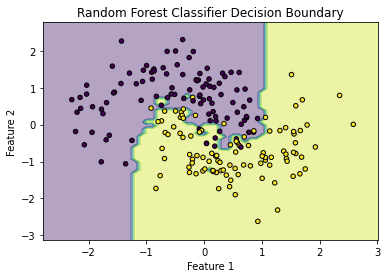

In [15]:
max_index_baggclass = max(range(len(acc_baggclass)), key=acc_baggclass.__getitem__)
max_acc_baggclass = acc_baggclass[max_index_baggclass]
max_index_rfclass = max(range(len(acc_rfclass)), key=acc_rfclass.__getitem__)
max_acc_rfclass = acc_rfclass[max_index_rfclass]

#Plotting Decision boundary for the highest accuracy 
if max_acc_rfclass >= max_acc_baggclass:
  #which is Random Forest Classifier 
  rf_clf = RandomForestClassifier(n_estimators=(max_index_rfclass+10)*10, random_state=42)
  rf_clf.fit(X_train_q1, y_train_q1)
  plt.title("Random Forest Classifier Decision Boundary")
else:
  rf_clf = BaggingClassifier(base_estimator=base_clf_q1, n_estimators=(max_index_baggclass+10)*10, random_state=42)
  rf_clf.fit(X_train_q1, y_train_q1)
  plt.title("Bagging Decision Boundary")

# Plotting the decision boundary
x_min_clf, x_max_clf = X_test_q1[:, 0].min() - 0.5, X_test_q1[:, 0].max() + 0.5
y_min_clf, y_max_clf = X_test_q1[:, 1].min() - 0.5, X_test_q1[:, 1].max() + 0.5
xx_clf, yy_clf = np.meshgrid(np.arange(x_min_clf, x_max_clf, 0.1), np.arange(y_min_clf, y_max_clf, 0.1))
Z_clf = rf_clf.predict(np.c_[xx_clf.ravel(), yy_clf.ravel()])
Z_clf = Z_clf.reshape(xx_clf.shape)
plt.contourf(xx_clf, yy_clf, Z_clf, alpha=0.4)
plt.scatter(X_test_q1[:, 0], X_test_q1[:, 1], c=y_test_q1, s=20, edgecolor='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# plt.figure()
# plot_decision_regions(X_test_q1, y_test_q1, clf=rf_clf, legend=2)
# plt.title("Random Forest Classifier")

### **Part 2**

In [35]:
#Bagging classifier from scratch

class BaggingClassifier:
    """
    A Bagging classifier that trains multiple decision tree classifiers on bootstrap samples of the training data
    and combines their predictions by majority voting.
    """

    def __init__(self, n_estimators=10, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.estimators = []
        
    def fit(self, X, y):
        """
        Fit the bagging classifier to the training data X and y.
        """
        for i in range(self.n_estimators):
            #Creating a bootstrap sample of the training data
            indices = np.random.choice(X.shape[0], size=X.shape[0], replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]
            
            #Training a decision tree classifier on the bootstrap sample
            estimator = DecisionTreeClassifier(max_depth=self.max_depth)
            estimator.fit(X_bootstrap, y_bootstrap)
            
            #Adding the trained classifier to the list of estimators
            self.estimators.append(estimator)
    
    def predict(self, X):
        """
        Predict the class labels for the test data X by majority voting over the predictions of the individual classifiers.
        """
        predictions = np.zeros((X.shape[0], len(self.estimators)))
        for i, estimator in enumerate(self.estimators):
            predictions[:, i] = estimator.predict(X)
        majority_vote = np.apply_along_axis(lambda x: int(round(np.mean(x))), axis=1, arr=predictions)
        return majority_vote



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# initialize the Bagging classifier with n_estimators=10 and max_depth=5
bagging = BaggingClassifier(n_estimators=10, max_depth=5)

# train the Bagging classifier on the training data
bagging.fit(X_train_q1, y_train_q1)

# make predictions on the test data
y_pred_bc_scratch = bagging.predict(X_test_q1)

# calculate the accuracy of the Bagging classifier
accuracy = accuracy_score(y_test_q1, y_pred_bc_scratch)

print("Bagging classifier accuracy: {:.4f}".format(accuracy))

Bagging classifier accuracy: 0.9350


## **Question 2**

In [16]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### **Part 1: AdaBoost Model**

In [18]:
from sklearn.ensemble import AdaBoostClassifier

#Initializing the AdaBoost classifier with DecisionTreeClassifier as the base estimator
ada = AdaBoostClassifier(n_estimators=80, base_estimator=DecisionTreeClassifier())

#Training the AdaBoost classifier
ada.fit(X_train_q1, y_train_q1)

#Evaluating the performance of the AdaBoost classifier on the testing set
acc_score_ada_train = ada.score(X_train_q1, y_train_q1)
acc_score_ada_test = ada.score(X_test_q1, y_test_q1)
print("Accuracy on the Training set:", acc_score_ada_train)
print("Accuracy on the Testing set:", acc_score_ada_test)

Accuracy on the Training set: 1.0
Accuracy on the Testing set: 0.905


### **Part 2: XGBoost Model**

In [19]:
from xgboost import XGBClassifier

# Define the XGBoost model with subsample=0.7
xgb_model = XGBClassifier(subsample=0.7)

# Train the model
xgb_model.fit(X_train_q1, y_train_q1)

# Evaluate the model on the test set
xgb_acc_score_train = xgb_model.score(X_train_q1, y_train_q1)
xgb_acc_score_test = xgb_model.score(X_test_q1, y_test_q1)

print("XGBoost model accuracy for Training set:", xgb_acc_score_train)
print("XGBoost model accuracy for Testing set:", xgb_acc_score_test)

XGBoost model accuracy for Training set: 0.995
XGBoost model accuracy for Testing set: 0.905


### Part 3 is completed in Part 1 and Part 2

### **Part 4: LightGBM Model**

In [20]:
from lightgbm import LGBMClassifier

#Training LightGBM Model with different values for num_leaves
num_leaves = np.arange(5,25)

for nl in num_leaves:
  model_lgb = LGBMClassifier(num_leaves=nl)
  model_lgb.fit(X_train_q1, y_train_q1)

  acc_score_lgb = model_lgb.score(X_test_q1, y_test_q1)
  print(f"Accuracy with num_leaves={nl}: {acc_score_lgb}")

Accuracy with num_leaves=5: 0.93
Accuracy with num_leaves=6: 0.92
Accuracy with num_leaves=7: 0.935
Accuracy with num_leaves=8: 0.93
Accuracy with num_leaves=9: 0.935
Accuracy with num_leaves=10: 0.925
Accuracy with num_leaves=11: 0.93
Accuracy with num_leaves=12: 0.925
Accuracy with num_leaves=13: 0.915
Accuracy with num_leaves=14: 0.915
Accuracy with num_leaves=15: 0.91
Accuracy with num_leaves=16: 0.915
Accuracy with num_leaves=17: 0.9
Accuracy with num_leaves=18: 0.905
Accuracy with num_leaves=19: 0.91
Accuracy with num_leaves=20: 0.905
Accuracy with num_leaves=21: 0.9
Accuracy with num_leaves=22: 0.91
Accuracy with num_leaves=23: 0.905
Accuracy with num_leaves=24: 0.91


### **Part 5: Analysing the relation between max_depth and num_leaves**

In [71]:
#Training LightGBM Model with different values for max_depth
max_depth = np.arange(2,19)

for depth in max_depth:
  model_lgb_depth = LGBMClassifier(max_depth=depth)
  model_lgb_depth.fit(X_train_q1, y_train_q1)

  acc_score_lgb_depth = model_lgb_depth.score(X_test_q1, y_test_q1)
  print(f"Accuracy with max_depth={depth}: {acc_score_lgb_depth}")

Accuracy with max_depth=2: 0.93
Accuracy with max_depth=3: 0.93
Accuracy with max_depth=4: 0.93
Accuracy with max_depth=5: 0.925
Accuracy with max_depth=6: 0.925
Accuracy with max_depth=7: 0.915
Accuracy with max_depth=8: 0.91
Accuracy with max_depth=9: 0.91
Accuracy with max_depth=10: 0.905
Accuracy with max_depth=11: 0.91
Accuracy with max_depth=12: 0.91
Accuracy with max_depth=13: 0.905
Accuracy with max_depth=14: 0.9
Accuracy with max_depth=15: 0.91
Accuracy with max_depth=16: 0.905
Accuracy with max_depth=17: 0.91
Accuracy with max_depth=18: 0.905


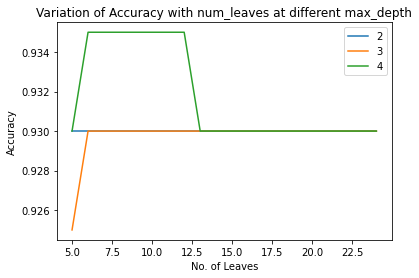

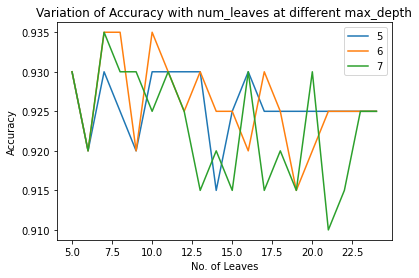

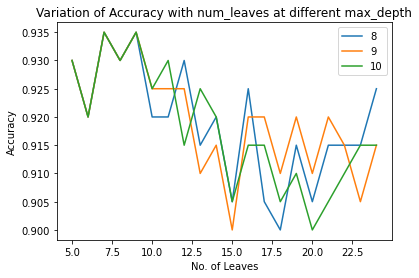

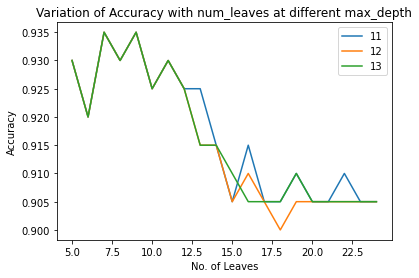

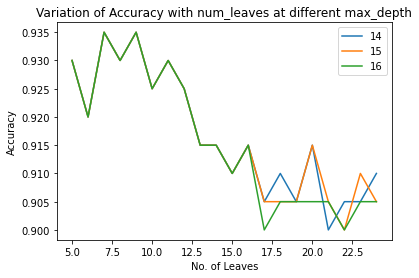

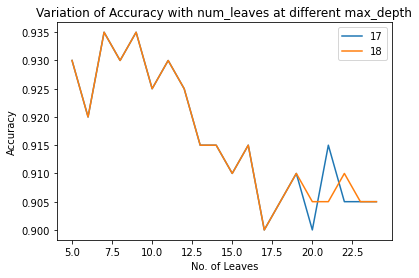

In [22]:


for depth in max_depth:
  acc=[]
  for nl in num_leaves:
    model = LGBMClassifier(max_depth=depth, num_leaves=nl)
    model.fit(X_train_q1,y_train_q1)
    score = model.score(X_test_q1,y_test_q1)
    acc.append(score)
  name=str(depth)
  plt.plot(num_leaves,acc,label=name)
  plt.legend()
  plt.xlabel("No. of Leaves")
  plt.ylabel("Accuracy")
  plt.title("Variation of Accuracy with num_leaves at different max_depth")
  if(depth-1)%3==0:
    plt.show()


### **Part 6: Analysis**

• Analysis:

With enough number of leaves, accuracy stops fluctuating and our model stops learning any new feature, for a given max_depth.

When max_depth is low( less than 5), variation of accuracies with increase in 
num_leaves is rather small and is consistent.

However, if max_depth is high, our accuracies first increase, reach their maxima and 
then take a local maximum.

From the above analysis, max_depth hyperparameter is best for controlling and tweaking accuracy while,
num_leaves hyperparameter is more suited for controlling ovrfitting of our model.

### **Part 7:  Decision Boundary**

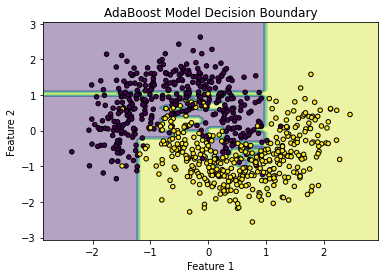

In [23]:
# Plotting the decision boundary for AdaBoost Model
x_min_ada, x_max_ada = X_train_q1[:, 0].min() - 0.5, X_train_q1[:, 0].max() + 0.5
y_min_ada, y_max_ada = X_train_q1[:, 1].min() - 0.5, X_train_q1[:, 1].max() + 0.5
xx_ada, yy_ada = np.meshgrid(np.arange(x_min_ada, x_max_ada, 0.1), np.arange(y_min_ada, y_max_ada, 0.1))
Z_ada = ada.predict(np.c_[xx_ada.ravel(), yy_ada.ravel()])
Z_ada = Z_ada.reshape(xx_ada.shape)
plt.contourf(xx_ada, yy_ada, Z_ada, alpha=0.4)
plt.scatter(X_train_q1[:, 0], X_train_q1[:, 1], c=y_train_q1, s=20, edgecolor='k')
plt.title("AdaBoost Model Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

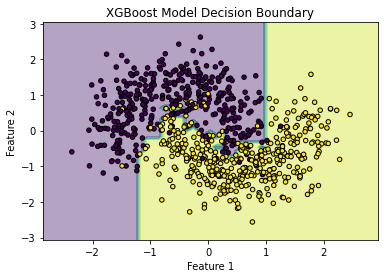

In [24]:
# Plotting the decision boundary for XGBoost Model
x_min_xgb, x_max_xgb = X_train_q1[:, 0].min() - 0.5, X_train_q1[:, 0].max() + 0.5
y_min_xgb, y_max_xgb = X_train_q1[:, 1].min() - 0.5, X_train_q1[:, 1].max() + 0.5
xx_xgb, yy_xgb = np.meshgrid(np.arange(x_min_xgb, x_max_xgb, 0.1), np.arange(y_min_xgb, y_max_xgb, 0.1))
Z_xgb = xgb_model.predict(np.c_[xx_xgb.ravel(), yy_xgb.ravel()])
Z_xgb = Z_xgb.reshape(xx_xgb.shape)
plt.contourf(xx_xgb, yy_xgb, Z_xgb, alpha=0.4)
plt.scatter(X_train_q1[:, 0], X_train_q1[:, 1], c=y_train_q1, s=20, edgecolor='k')
plt.title("XGBoost Model Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

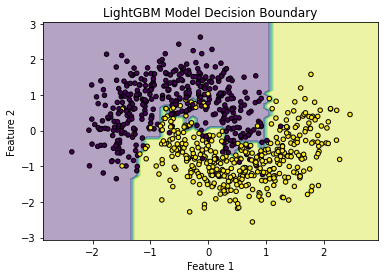

In [25]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train_q1, y_train_q1)

# Plotting the decision boundary for LightGBM Model
x_min_lgbm, x_max_lgbm = X_train_q1[:, 0].min() - 0.5, X_train_q1[:, 0].max() + 0.5
y_min_lgbm, y_max_lgbm = X_train_q1[:, 1].min() - 0.5, X_train_q1[:, 1].max() + 0.5
xx_lgbm, yy_lgbm = np.meshgrid(np.arange(x_min_lgbm, x_max_lgbm, 0.1), np.arange(y_min_lgbm, y_max_lgbm, 0.1))
Z_lgbm = model_lgbm.predict(np.c_[xx_lgbm.ravel(), yy_lgbm.ravel()])
Z_lgbm = Z_lgbm.reshape(xx_lgbm.shape)
plt.contourf(xx_lgbm, yy_lgbm, Z_lgbm, alpha=0.4)
plt.scatter(X_train_q1[:, 0], X_train_q1[:, 1], c=y_train_q1, s=20, edgecolor='k')
plt.title("LightGBM Model Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **Question 3**

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Gaussian Naive Bayes classifier
gnb = GaussianNB()

#Tuning the hyperparameters using GridSearch
param_grid = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}
grid_search = GridSearchCV(gnb, param_grid, cv=5)
grid_search.fit(X_train_q1, y_train_q1)
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

#Training the model with best hyperparameters
gnb = GaussianNB(var_smoothing=best_params['var_smoothing'])
gnb.fit(X_train_q1, y_train_q1)

# Evaluate the best model on the test data
y_pred_gnb = gnb.predict(X_test_q1)
accuracy_gnb = accuracy_score(y_test_q1, y_pred_gnb)
print("Accuracy:", accuracy_gnb)

Best hyperparameters: {'var_smoothing': 1e-09}
Accuracy: 0.82


In [29]:
from sklearn.ensemble import VotingClassifier

'''We have already trained the individual models and stored in variables
   AdaBoost: ada
   XGBoost: xgb_model
   LightGBM model: model_lgbm
   '''

#Creating the Ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('adaboost', ada), 
    ('xgboost', xgb_model),
    ('lgbm', model_lgbm)],
    voting='hard')

#Training the Ensemble model
ensemble_model.fit(X_train_q1, y_train_q1)

#Making predictions on the test set
y_pred_ensemble = ensemble_model.predict(X_test_q1)

#Evaluating accuracy of the ensemble model
ensemble_accuracy = accuracy_score(y_test_q1, y_pred_ensemble)

#Evaluating accuracy of individual models
adaboost_accuracy = accuracy_score(y_test_q1, ada.predict(X_test_q1))
xgboost_accuracy = accuracy_score(y_test_q1, xgb_model.predict(X_test_q1))
lgbm_accuracy = accuracy_score(y_test_q1, model_lgbm.predict(X_test_q1))

print("Ensemble model accuracy: {:.4f}".format(ensemble_accuracy))
print("Adaboost model accuracy: {:.4f}".format(adaboost_accuracy))
print("XGBoost model accuracy: {:.4f}".format(xgboost_accuracy))
print("LightGBM model accuracy: {:.4f}".format(lgbm_accuracy))

Ensemble model accuracy: 0.9050
Adaboost model accuracy: 0.9050
XGBoost model accuracy: 0.9050
LightGBM model accuracy: 0.9050
